<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 의료비 예측


<img src = "https://github.com/Jangrae/img/blob/master/medical.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [126]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 하위 몇 개 행 확인
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [8]:
# 상관분석
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


5-2) 상관관계를 시각화해 확인합니다.

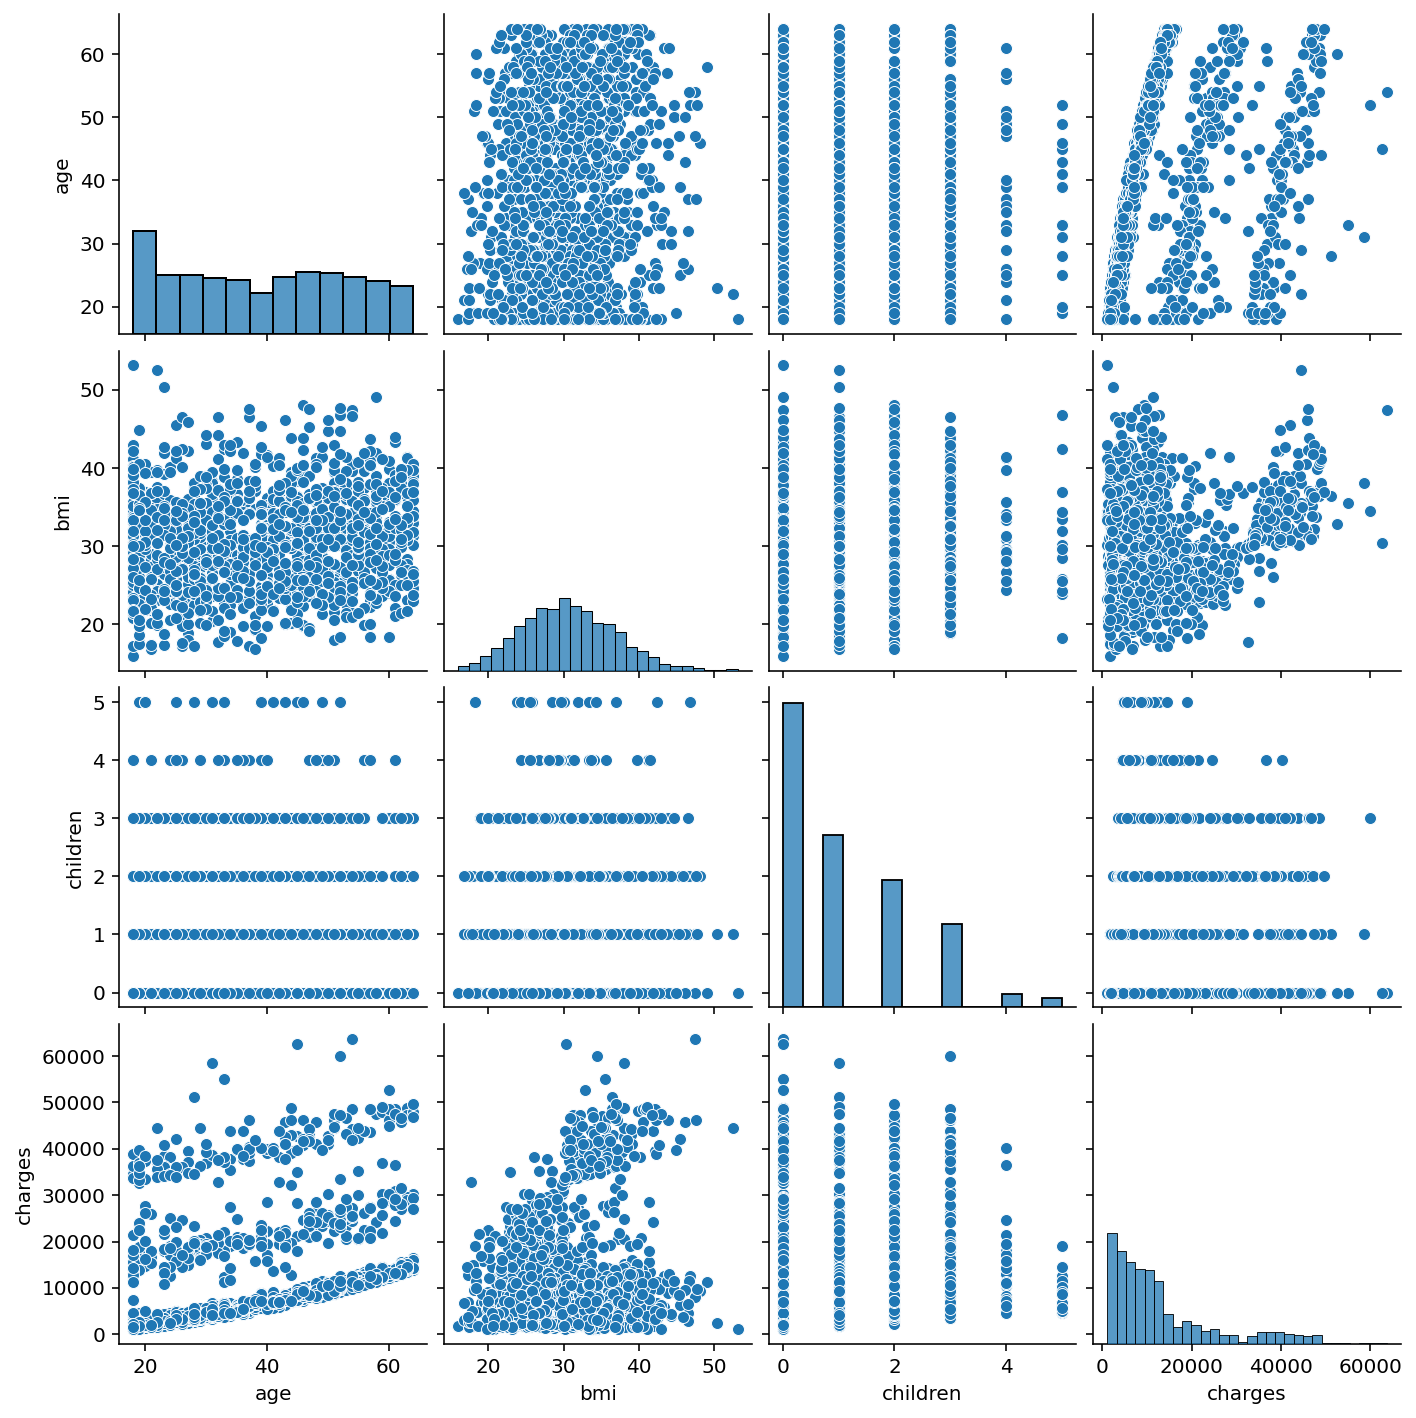

In [123]:
# 상관분석
sns.pairplot(data)
plt.show()

- (의견) 나이가 많을수록 의료비 지출이 증가한다
- (의견) BMI 지수가 높을수록 의료비 지출이 증가한다

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [14]:
# 범주값 개수 확인

print(data['sex'].value_counts())
print('-' * 30)
print(data['smoker'].value_counts())
print('-' * 30)
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
------------------------------
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**7) 주요 변수 확인**

7-1) charge 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

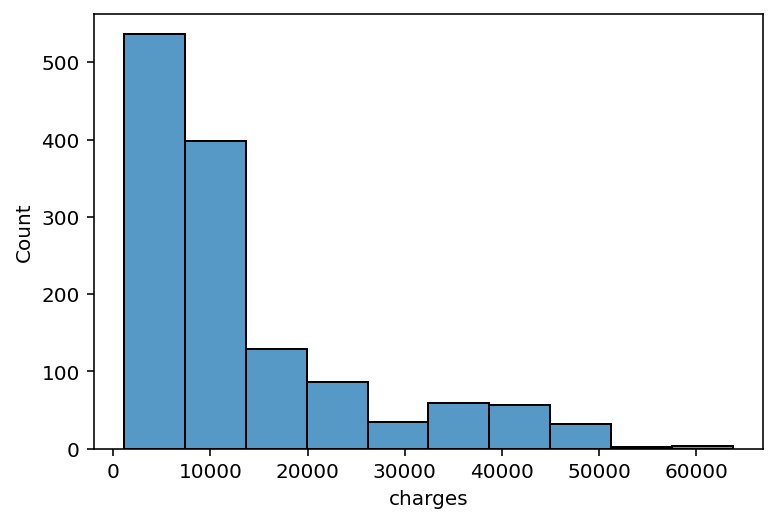

In [19]:
# target 정의
target = 'charges'
# charge 값 분포
sns.histplot(data=data[target], bins=10)
plt.show()


- (의견) 의료비로 20000달러 이하를 제출하는 경우가 대부분인 것 같다
- (의견) 성별, 지역별 표본 수는 비슷한데 흡연자/금연자 표본이 숫자 차이가 심하다
- (의견) 흡연자를 대상으로 의료비를 예측할 경우 정확도가 떨어질 것 같다

7-2) age, charges 변수간 상관관계를 산점도(Scatter Plot)으로 시각화해 확인합니다.

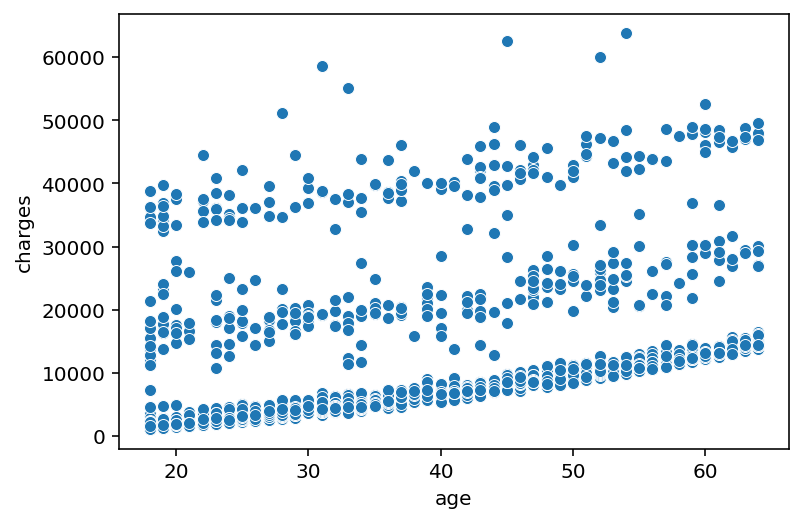

In [15]:
# age, charges 상관관계
sns.scatterplot(data=data, x='age', y='charges')
plt.show()


- (의견) 연령대가 높아질수록 의료비 지출이 증가한다.
- (의견) 의료비 지출 수준이 약 3단계로 나뉘어 있는데, 이렇게 단계가 나뉘어서 나오는 이유가 궁금하다.
- (의견) 혹시 나이대 별로 건강 수준, 경제 수준에 따라 나뉘는 건 아닐까(건강함/보통/건강하지 않음), (고소득/중산층/서민 등)

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

- sex, smoker, region 변수들에 대한 가변수화를 진행 합니다.

In [128]:
# 가변수화
cols = ['sex','smoker','region']

data = pd.get_dummies(data, columns=cols, drop_first=True)


# 확인
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**2) 상관분석**

2-1) 변수가 추가되었으니 변수들 간의 상관관계를 다시 확인합니다.

In [21]:
# 상관분석
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


2-2) 변수들 간의 상관관계를 다시 시각화해 확인합니다.

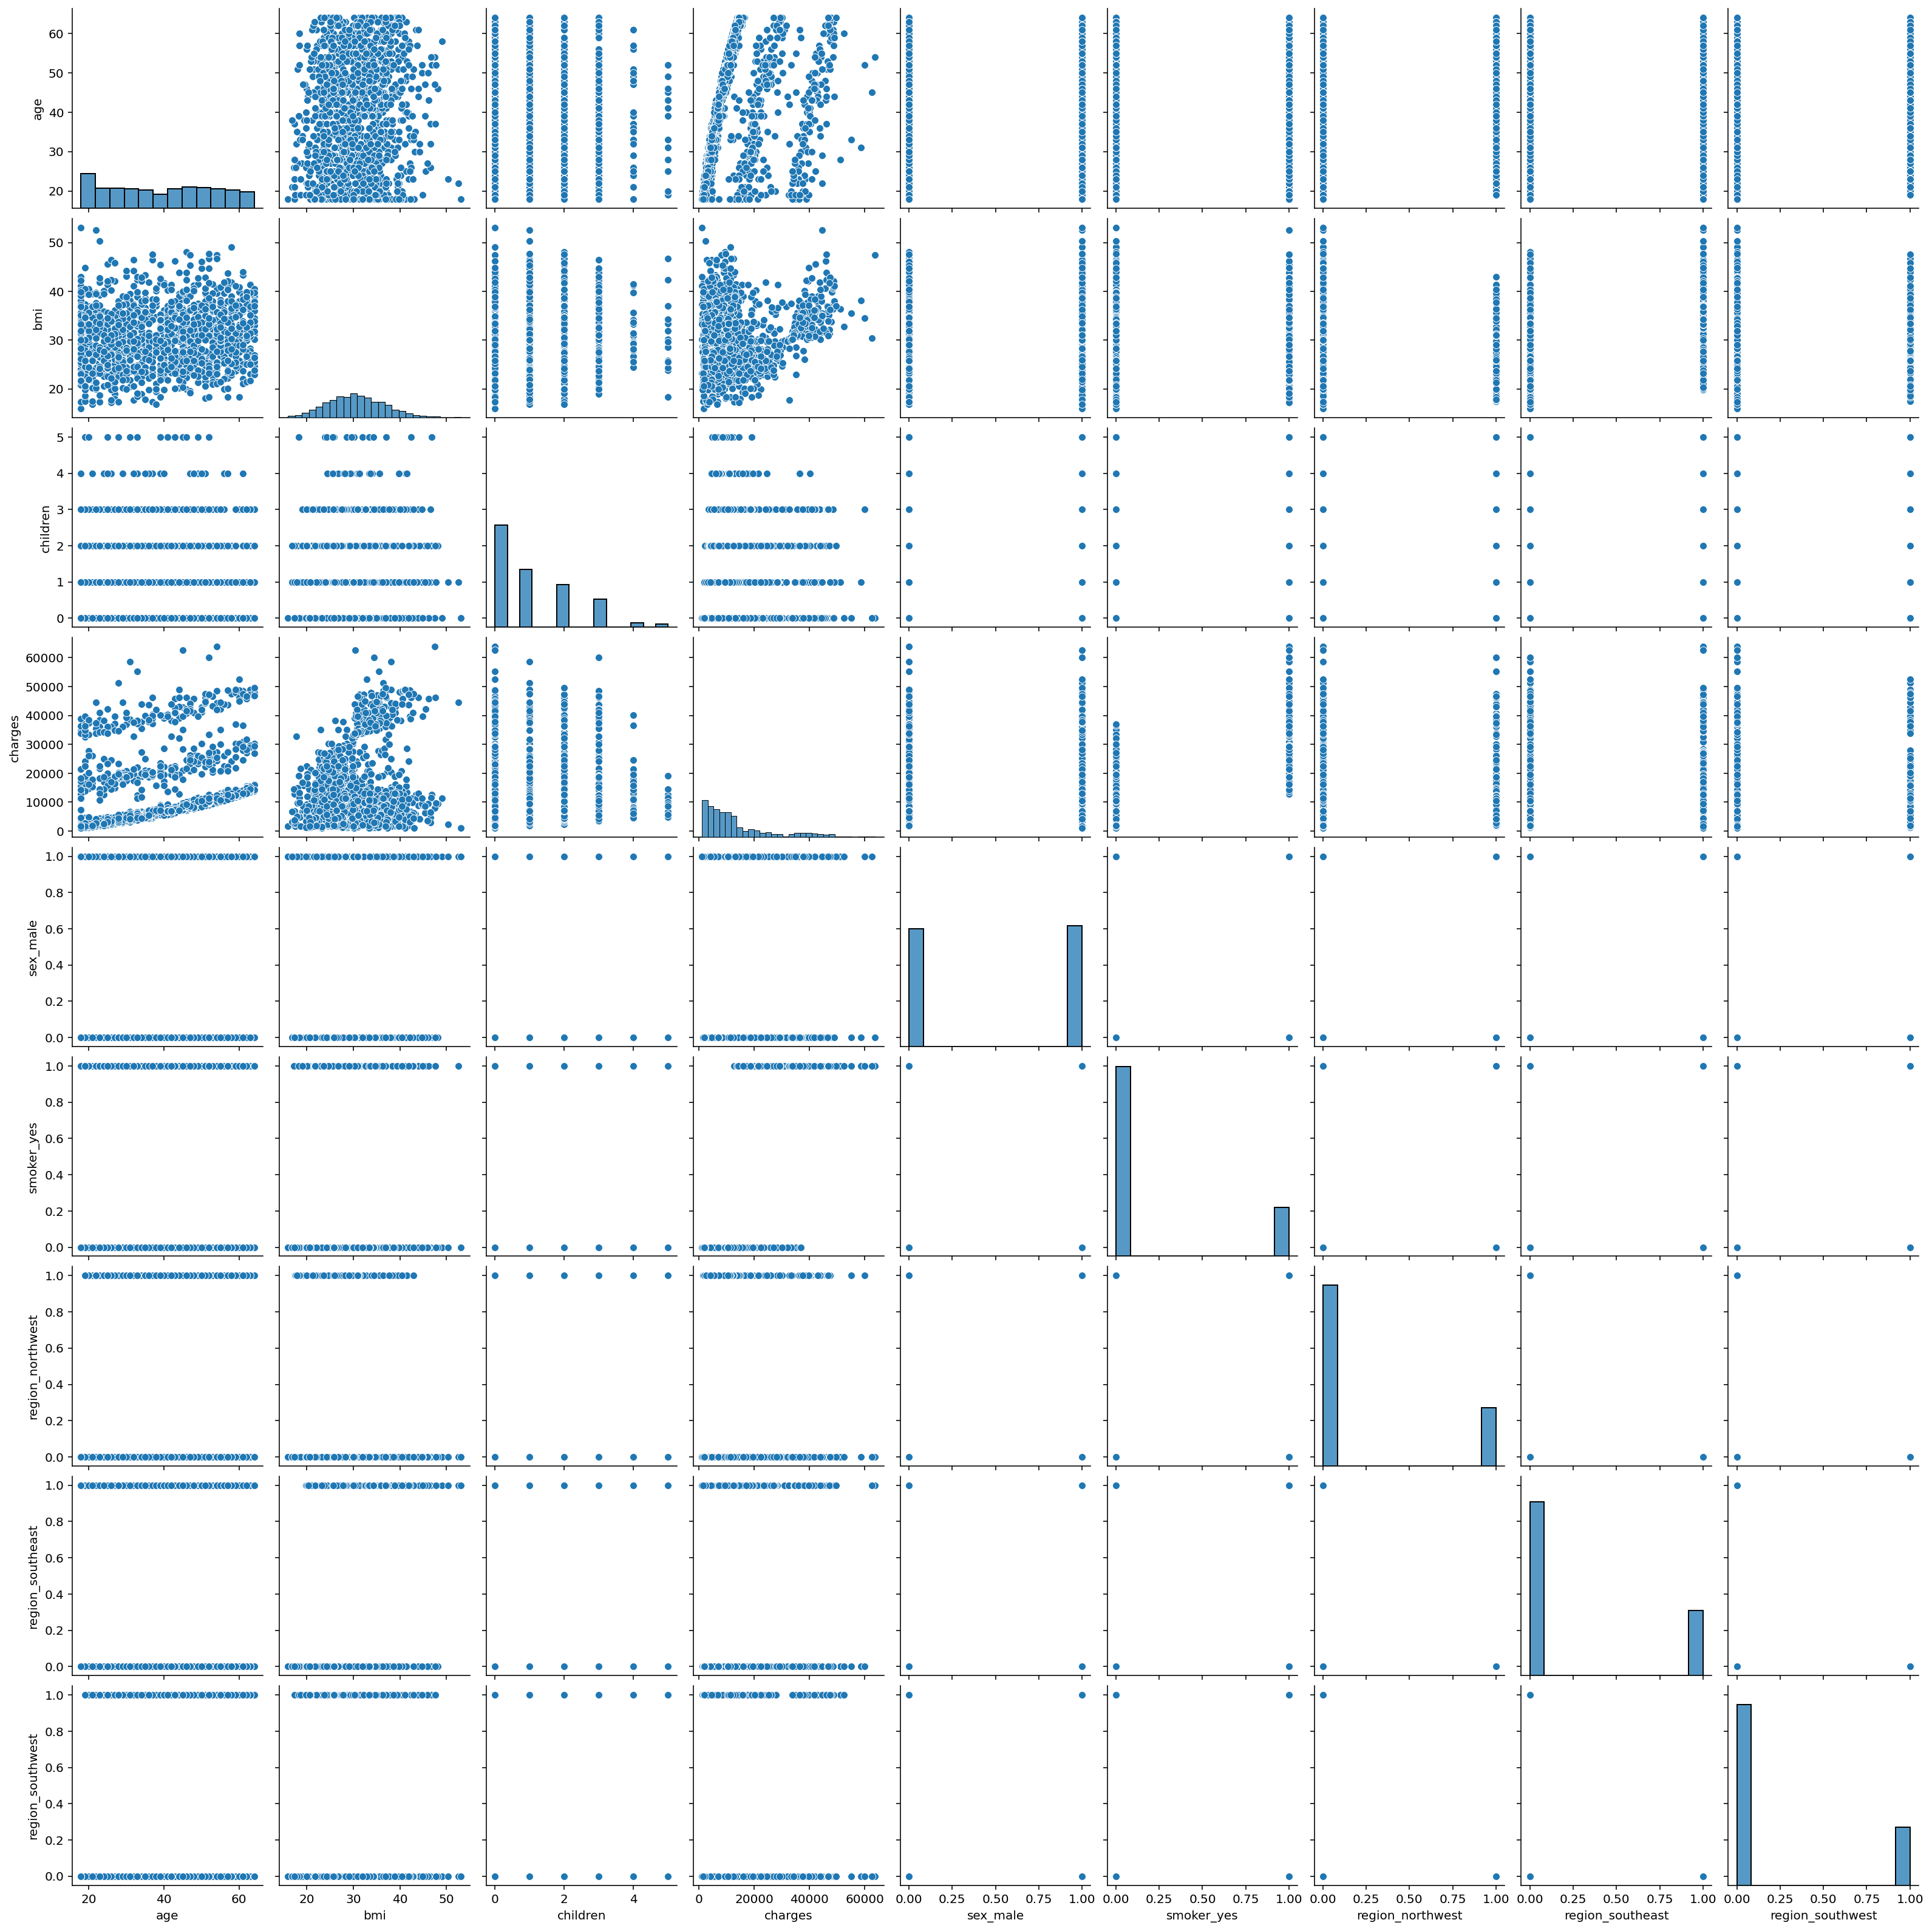

In [129]:
# 상관분석(Visualize)
sns.pairplot(data)
plt.show()

- (의견) 흡연 여부와 의료비 지출 금액의 상관관계가 매우 강하다
- (의견) southeast 지역은 의료비 지출과의 상관관계가 다른 지역보다 큰 것 같다

**3) x, y 분리**

- charges 변수가 Target입니다.

In [96]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [24]:
# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [25]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용이 있으면 이를 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

### 4.1.1.모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [87]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# 2단계: 선언하기
model = LinearRegression()

In [89]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [90]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [91]:
# 5단계: 평가하기
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 4023.060412326256
MSE : 34204836.93847414
R2 Score : 0.7815638027456551


### 4.1.2.회귀 계수 확인

- 모델의 coef_, intercept_ 속성으로 변수들의 회귀 계수를 확인합니다.

In [92]:
# 회귀 계수 확인
print(model.coef_)
print('-'*30)
print(model.intercept_)

[  243.60038821   306.46006963   472.73303281  -221.31454859
 23707.39225536  -121.77571388 -1088.93802262  -877.25427208]
------------------------------
-10334.708051219171


- 모델의 회귀 계수(coef_)를 가로막대 그래프로 시각화해 확인합니다.

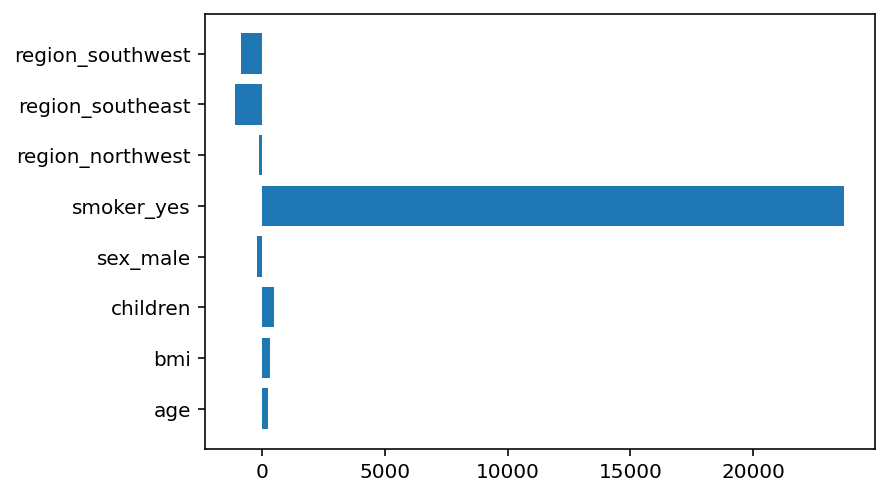

In [98]:
# 변수별 회귀계수 시각화
plt.barh(list(x),model.coef_)
plt.show()

- (의견) 남쪽지역(southwest, southest)은 의료비 지출과의 상관관계가 다른 지역보다 크게 나타나는데 그 이유가 뭘까?
- (의견) 시각화 자료에서는 제법 상관이 있는 것처럼 나왔는데 BMI와 연령이 의료비 지출과 큰 상관관계가 없다는 결론이 나온 이유가 뭘까?

### 4.1.3.성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [46]:
# 성능 정보 수집
score={}
score['Linear Regression'] = r2_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [105]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor


In [106]:
# 2단계: 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [107]:
# 3단계: 학습하기
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=2022)

In [108]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [109]:
# 5단계: 평가하기
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 2881.683901691543
MSE : 40053731.03798216
R2 Score : 0.7442120624775168


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [110]:
# 중요도 확인
print(model.feature_importances_)


[0.13245768 0.20970548 0.01944122 0.0051565  0.61850291 0.00548565
 0.00755326 0.00169731]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

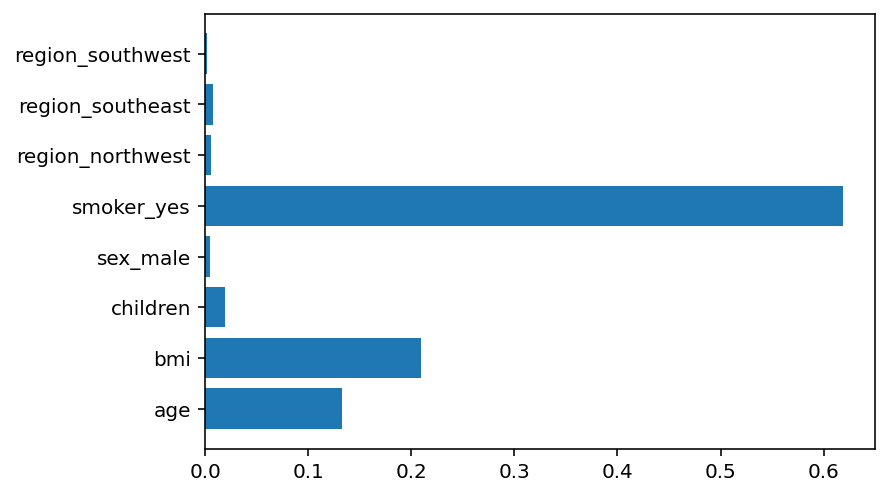

In [111]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()

- (의견) 선형회귀 모델과 달리 흡연자, 고령자, 비만자(BMI 지수 높을수록)인 경우 의료비와의 상관관계를 높이 평가했다.
- (의견) 거주지와 의료비와의 상관관계가 선형회귀만큼 크게 평가되지는 않았지만 어느 정도 의미가 있는 것은 확실하다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [59]:
# 성능 정보 수집
score['Decision Tree'] = r2_score(y_test, y_pred)

In [60]:
# 성능 조회
print(score)

{'Linear Regression': 0.7815638027456551, 'Decision Tree': 0.7442120624775168}


## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [61]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestRegressor


In [62]:
# 2단계: 선언하기
model = RandomForestRegressor(random_state=2022)

In [63]:
# 3단계: 학습하기
model.fit(x_train,y_train)

RandomForestRegressor(random_state=2022)

In [64]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [65]:
# 5단계: 평가하기
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 2546.9596018735906
MSE : 21506626.406567674
R2 Score : 0.8626561004669977


### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [66]:
# 중요도 확인
print(model.feature_importances_)


[0.13058358 0.20652291 0.02258343 0.00627828 0.61625573 0.00663591
 0.00637816 0.004762  ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

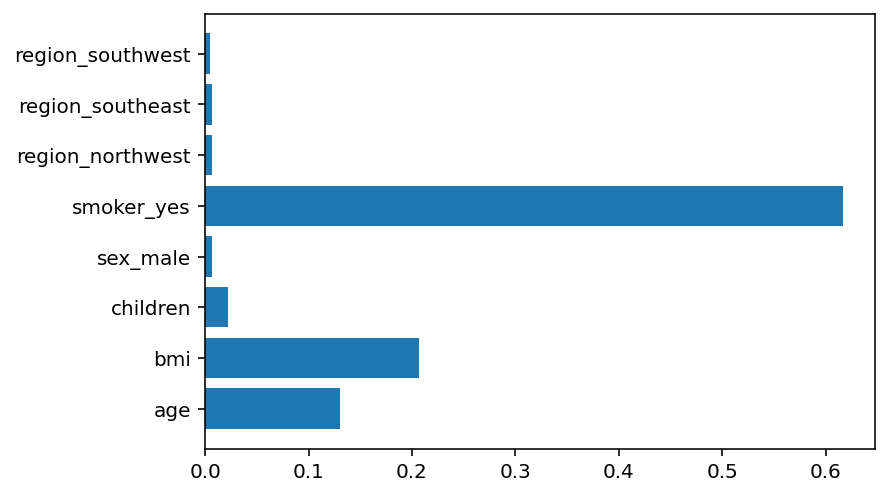

In [67]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) 랜덤포레스트 모델 역시 의사결정모델과 비슷한 결과가 나왔다
- (의견) 다만 랜덤포레스트 모델은 다른 모델들과 달리 지역 별 의료비 지출의 상관관계는 지역 간 차이가 없고, 자녀 수와 의료비가 비교적 큰 상관관계를 가진다고 판단했다

- (의견) 자녀와 의료비와의 상관관계가 있는 이유는 단순히 가족 구성원 수가 많아서 그런 것일까, 아니면 소아 의료 지출과 상관관계가 있는 다른 원인 때문일까?

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [68]:
# 성능 정보 수집
score['Random Forest'] = r2_score(y_test, y_pred)

In [69]:
# 성능 중간조회
print(score)

{'Linear Regression': 0.7815638027456551, 'Decision Tree': 0.7442120624775168, 'Random Forest': 0.8626561004669977}


## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [70]:
# 1단계: 불러오기
from xgboost import XGBRegressor


In [71]:
# 2단계: 선언하기
model = XGBRegressor()

In [72]:
# 3단계: 학습하기
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [74]:
# 5단계: 평가하기
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 2983.640758507754
MSE : 26226443.87148965
R2 Score : 0.8325147792080578


### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [75]:
# 중요도 확인
print(model.feature_importances_)


[0.01565696 0.01860508 0.00777858 0.0041144  0.9380717  0.00592639
 0.00505249 0.00479442]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

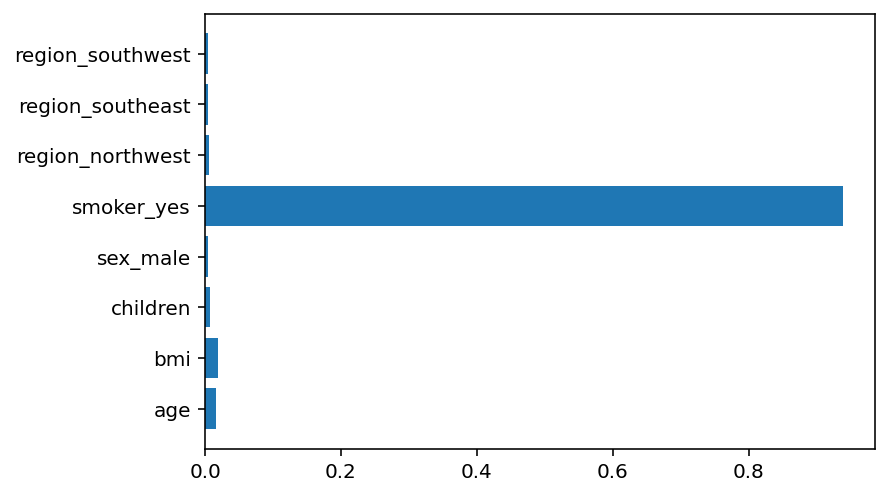

In [76]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) XGBoost는 다른 모델들보다 흡연 여부와 의료비 지출의 상관관계를 더 중시한 것 같다
- (의견) 시각화했을 때 연령대와 BMI는 각각 3개, 2개 층으로 나뉜 듯한 모습이었는데, XGBoost는 이에 대해서 관련성이 낮다고 판단한 것 같다

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [77]:
# 성능 정보 수집
score['XGBoost'] = r2_score(y_test, y_pred)

In [78]:
# 성능 정보 중간 정리
print(score)

{'Linear Regression': 0.7815638027456551, 'Decision Tree': 0.7442120624775168, 'Random Forest': 0.8626561004669977, 'XGBoost': 0.8325147792080578}


# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.7816
-Decision Tree: 0.7442
-Random Forest: 0.8627
-XGBoost: 0.8325


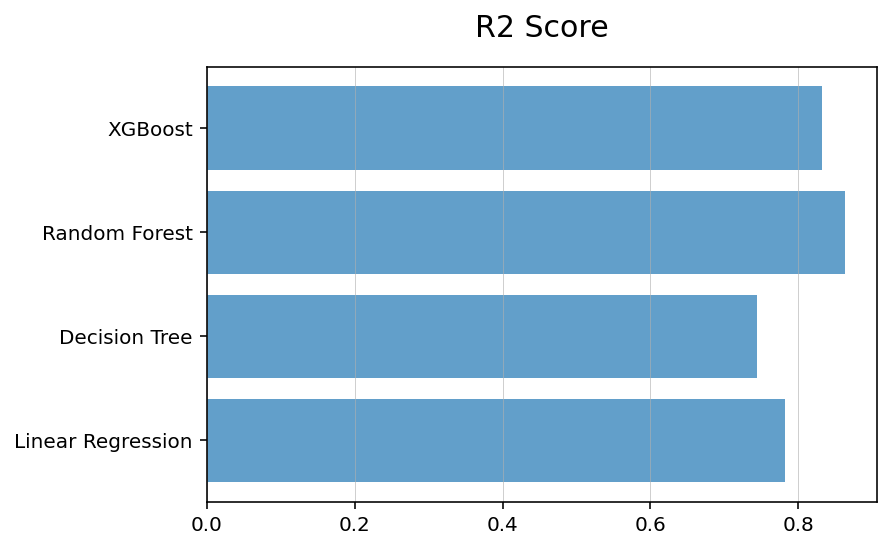

In [79]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) 데이터를 분할해서 분석한 결과(랜덤포레스트) 보다 정확하게 예측할 수 있었던 것 같다.
- (의견) 랜덤포레스트 모델을 튜닝해서 최적화하는 것도 좋지만 정확도가 이보다 더 높아지면 과적합 현상이 발생할 것 같다.
- (의견) XGBoost는 다른 모델들보다 연령과 BMI지수가 의료비와 관련성이 적다고 판단했음에도 상당한 정확도를 보인 것을 보면 이 두 변수는 의료비 지출과 약한 상관관계가 있는 것 같다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [ ]:
x

In [124]:
# 의사결정모델(DecisionTree) 튜닝 - 변수 정의
from sklearn.model_selection import RandomizedSearchCV
rd_model = DecisionTreeRegressor(random_state=2022)
rd_params = {'max_depth':range(3,31),'min_samples_leaf':range(1,11),'min_samples_split':range(1,11)}

# 모델 정의
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='r2', n_iter=30)

# 모델 학습
model.fit(x_train,y_train)

# 모델 예측 및 평가
y_pred = model.predict(x_test)

print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 2658.832486820942
MSE : 20076881.43110747
R2 Score : 0.8717866236162468


In [116]:
# 최적의 성능을 보였던 파라미터 조회
print(model.best_estimator_)
print(model.best_params_)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=7, min_samples_split=7,
                      random_state=2022)
{'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 4}


In [117]:
# 튜닝 결과 반영
score['Decision Tree(UP)'] = r2_score(y_test, y_pred)

In [118]:
# 저장된 성능값 조회
print(score)

{'Linear Regression': 0.7815638027456551, 'Decision Tree': 0.7442120624775168, 'Random Forest': 0.8626561004669977, 'XGBoost': 0.8325147792080578, 'Decision Tree(UP)': 0.8717866236162468}


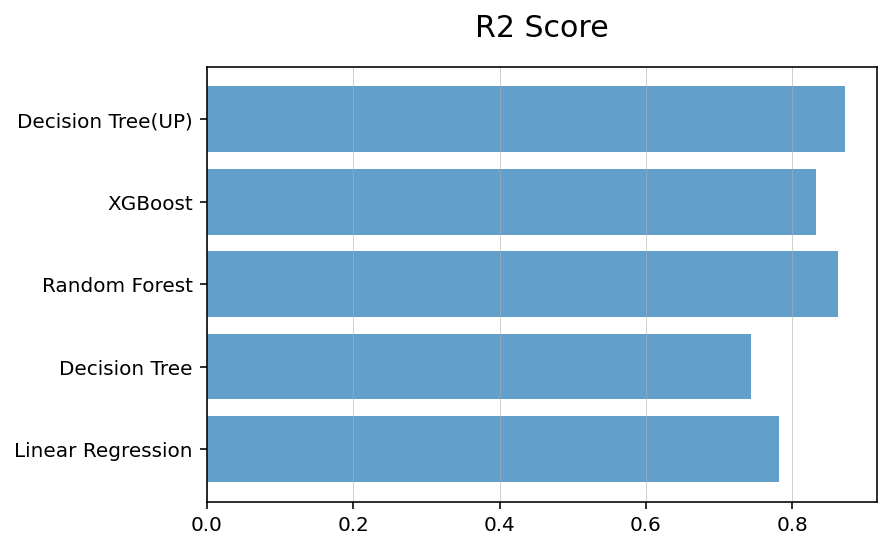

In [119]:
# 저장된 성능값 조회(Visualize)
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) 의사결정나무 알고리즘 기반 모델이 효과적이였던 것 같다.
- (의견) 선형회귀모델을 제대로 사용하려면 추가적인 데이터 전처리가 필요할 것 같다.
- (의견) BMI와 연령에 대해서는 의사결정모델과 선형회귀모델이 상반된 판단을 내리는 만큼, 연령과 BMI지수를 가르는 다른 요인(생활수준, 환경오염, 행정서비스 등)을 찾아볼 필요가 있다.